In [7]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

In [8]:
# Convert the specified columns to categorical
Dataset_Train['stress_level'] = Dataset_Train['stress_level'].astype('category')

# Verify the changes
print(Dataset_Train[['stress_level']].dtypes)

stress_level    category
dtype: object


In [9]:
# Convert the specified columns to categorical
Dataset_Test['stress_level'] = Dataset_Test['stress_level'].astype('category')

# Verify the changes
print(Dataset_Test[['stress_level']].dtypes)

stress_level    category
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Train Accuracy: 0.8529166666666667
✅ Test Accuracy: 0.6983333333333334

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.25      0.02      0.04        87
     healthy       0.71      0.98      0.82       427

    accuracy                           0.70       600
   macro avg       0.24      0.25      0.22       600
weighted avg       0.54      0.70      0.59       600



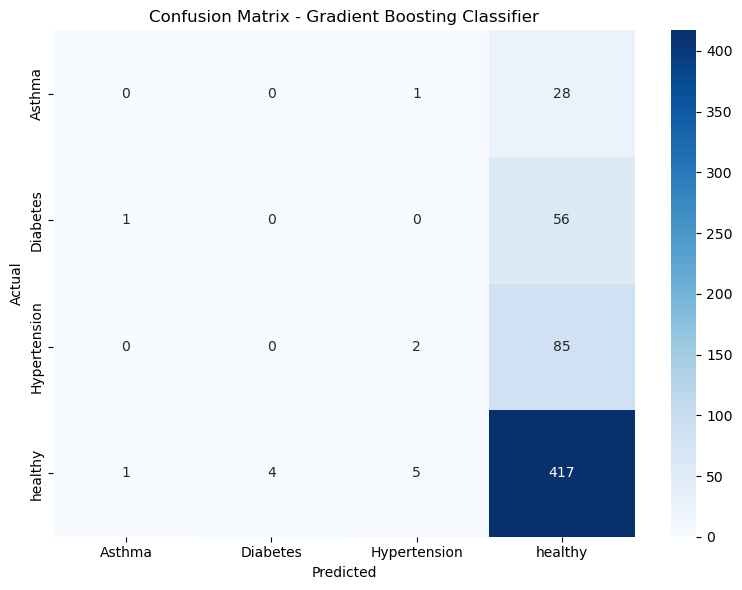

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 1. Prepare features and target
# ================================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ================================================
# 2. Identify numeric and categorical columns
# ================================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ================================================
# 3. Preprocessing pipeline
# ================================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# ================================================
# 4. Transform data
# ================================================
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ================================================
# 5. Encode target variable
# ================================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ================================================
# 6. Train Gradient Boosting Classifier
# ================================================
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train_processed, y_train_encoded)

# ================================================
# 7. Predictions
# ================================================
y_train_pred = le.inverse_transform(gb_model.predict(X_train_processed))
y_test_pred = le.inverse_transform(gb_model.predict(X_test_processed))

# ================================================
# 8. Evaluation
# ================================================
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ================================================
# 9. Confusion Matrix
# ================================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
